In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
dataset = pd.read_csv("Data/heart.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
sns.countplot(x="sex", data=dataset, palette="mako_r")
plt.xlabel("Sex = 0:Female - 1:Male")
plt.show()

NameError: name 'sns' is not defined

In [4]:
count_female = len(dataset[dataset.sex == 0])
count_male = len(dataset[dataset.sex == 1])
print(f"Persentase Pasien Wanita: {round(count_female / len(dataset.sex) * 100,2)}%")
print(f"Persentase Pasien Pria: {round(count_male / len(dataset.sex) * 100,2)}%")

Persentase Pasien Wanita: 31.68%
Persentase Pasien Pria: 68.32%


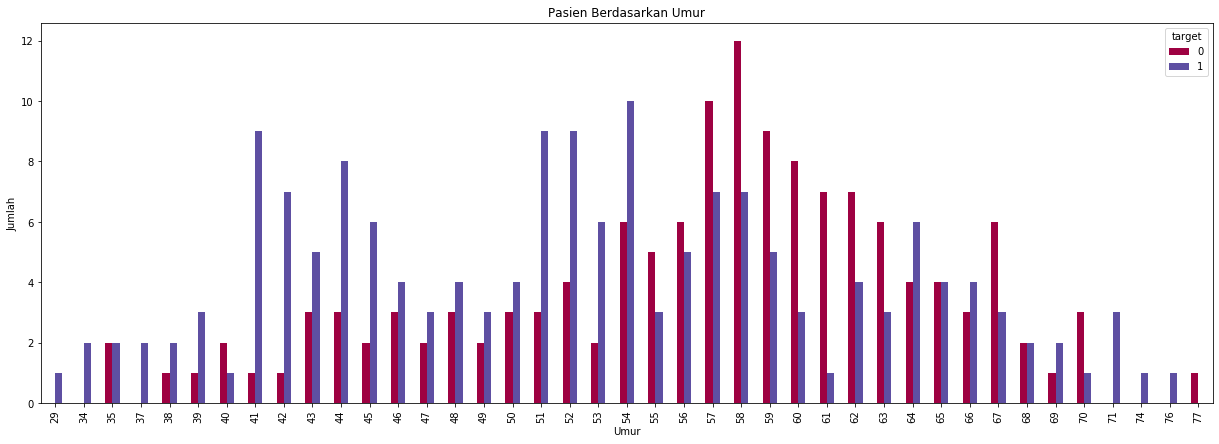

In [5]:
pd.crosstab(dataset.age, dataset.target).plot(kind="bar", figsize=(21,7), colormap="Spectral")
plt.title("Pasien Berdasarkan Umur")
plt.xlabel("Umur")
plt.ylabel("Jumlah")
plt.show()

In [6]:
# ini adalah kunci untuk akurasi yang tinggi
# karena ada beberapa kolom yang memberikan data berupa kategori (lebih dari 2 = kategori (kesimpulan sementara))
# jadi semua kolom yang datanya kategori diubah menjadi dummy
a = pd.get_dummies(dataset['cp'], prefix = "cp")
b = pd.get_dummies(dataset['thal'], prefix = "thal")
c = pd.get_dummies(dataset['slope'], prefix = "slope")
d = pd.get_dummies(dataset["restecg"], prefix= "restecg")

In [7]:
frames = [dataset, a, b, c, d]
dataset = pd.concat(frames, axis = 1)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,1,0,1,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,1,0,0,0,1,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,1,0,0,0,1,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,1,0,0,0,1,0,1,0


In [8]:
dataset = dataset.drop(columns = ['cp', 'thal', 'slope', 'restecg'])
dataset.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2,restecg_0,restecg_1,restecg_2
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,0,1,0,1,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,1,0,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,1,0,0,0,1,0,1,0


In [9]:
X = dataset.iloc[:, 0:-1]
y = dataset.target.values

In [10]:
# data is already clean
# normalisasi
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [11]:
# splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [13]:
from sklearn.svm import SVC
svm = SVC(gamma="scale", random_state=1)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

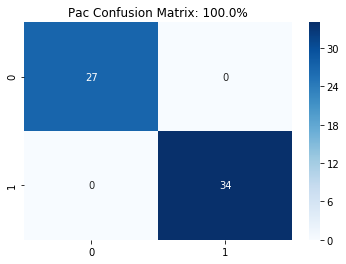

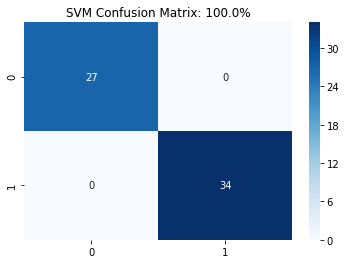

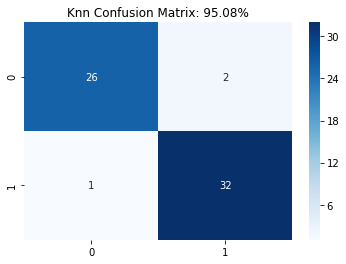

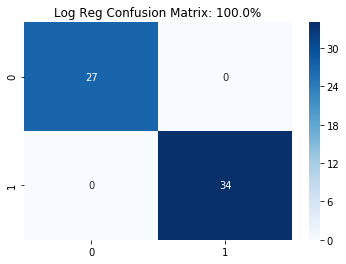

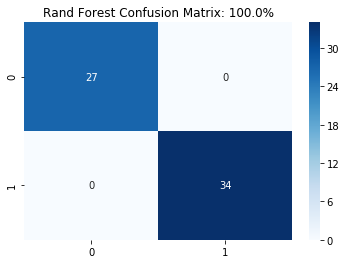

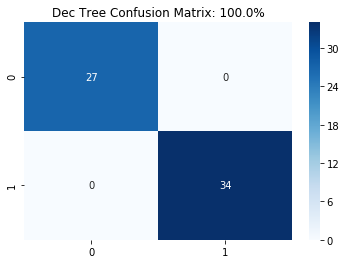

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nama_clasifier = ["Pac", "SVM", "Knn", "Log Reg", "Rand Forest", "Dec Tree"]
models = [pac, svm, knn, lr, rf, dt]
akurasi = []
index = 0

for model in models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred, y_test)
    cm = confusion_matrix(y_pred, y_test)
    plt.title(f"{nama_clasifier[index]} Confusion Matrix: {round(acc*100,2)}%")
    sns.heatmap(cm, cmap="Blues", annot=True)
    plt.show()
    
    akurasi.append(acc)
    index += 1

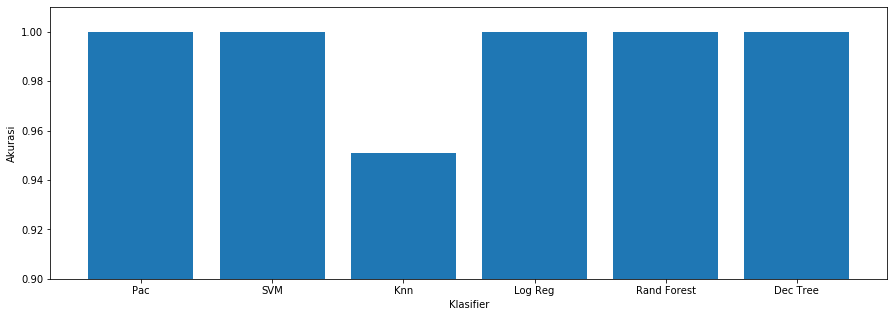

In [19]:
plt.figure(figsize=(15,5)) # urutan (width, height)
plt.bar(nama_clasifier, akurasi)
plt.xlabel("Klasifier")
plt.ylabel("Akurasi")
plt.ylim(0.9, 1.01)
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score
#Now lets try to do some evaluation for random forest model using cross validation.
evaluasi_pac = cross_val_score(estimator = pac, X = X_train, y = y_train, cv = 10)
evaluasi_svm = cross_val_score(estimator = svm, X = X_train, y = y_train, cv = 10)
evaluasi_knn = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
evaluasi_lr = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
evaluasi_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)
evaluasi_dt = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

In [29]:
print(f"Score Cross-Validation Passive Aggresive      : {round(evaluasi_pac.mean()*100,2)} %")
print(f"Score Cross-Validation Support Vector Machine : {round(evaluasi_svm.mean()*100,2)} %")
print(f"Score Cross-Validation K-Nearest Neighbor     : {round(evaluasi_knn.mean()*100,2)} %")
print(f"Score Cross-Validation Logistic Regression    : {round(evaluasi_lr.mean()*100,2)} %")
print(f"Score Cross-Validation Random Forest          : {round(evaluasi_rf.mean()*100,2)} %")
print(f"Score Cross-Validation Decision Tree          : {round(evaluasi_dt.mean()*100,2)} %")

Score Cross-Validation Passive Aggresive      : 100.0 %
Score Cross-Validation Support Vector Machine : 100.0 %
Score Cross-Validation K-Nearest Neighbor     : 90.1 %
Score Cross-Validation Logistic Regression    : 100.0 %
Score Cross-Validation Random Forest          : 99.58 %
Score Cross-Validation Decision Tree          : 100.0 %


In [31]:
# optimisasi
# Grid Search Cross Validation (GridSearchCV) 
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svm, param_grid=param, scoring='accuracy', cv=10)

In [32]:
grid_svc.fit(X_train, y_train)
grid_svc.best_params_

C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
input_age = int(input("Umur: "))
print("""Jenis Kelamin 
      Pria = 1
      Wanita = 0""")
input_sex = int(input("Jenis Kelamin: "))
print("""Tipe Nyeri Dada: 
      1. Typical Angina = 0 
      2. Atypical Angina = 1
      3. Non-Anginal Pain = 2
      4. Asymptomatic = 3""")
input_cp = int(input("Tipe Nyeri Dada: "))
input_trestbps = int(input("Tekanan Darah: "))
input_chol = int(input("kolesterol: "))
print("Gula Darah > 120mg/dl = 1, jika tidak = 0")
input_fbs = int(input("Gula Darah: "))
print("""Elektrokardiografi
      Normal = 0
      ST-T Wave Abnormality = 1
      Ventricular Hypertrophy = 2""")
input_restecg = int(input("Elektrokardiografi: "))
input_thalach = int(input("Maks Detak Jantung: "))
print("Angina Positif = 1, jika tidak = 0")
input_exang = int(input("Angina: "))
input_oldpeak = float(input("Tingkat Depresi(ECG): "))
print("""Slope
      Upsloping = 0
      Flat = 1
      Downsloping = 2""")
input_slope = int(input("Tipe Slope Latihan Puncak: "))
input_ca = int(input("Nomor Pembuluh Besar: "))
print("""Tipe Kelainan Darah
      Normal/Tidak ada = 1""")
print("""Tipe Thalasemia
      Normal = 1
      Fixed_defect = 2
      Reversable-defect = 3""")
input_thal = int(input("Tipe Kelainan Darah(Thalasemia): "))
# input_age = 45
# input_sex = 1
# input_cp = 3
# input_trestbps = 110
# input_chol = 264
# input_fbs = 0
# input_restecg = 1
# input_thalach = 132
# input_exang = 0
# input_oldpeak = 1.2
# input_slope = 1
# input_ca = 0
# input_thal = 3
input_cp_0 = 0
input_cp_1 = 0
input_cp_2 = 0
input_cp_3 = 0
input_thal_0 = 0
input_thal_1 = 0
input_thal_2 = 0
input_thal_3 = 0
input_slope_0 = 0
input_slope_1 = 0
input_slope_2 = 0
input_restecg_0 = 0
input_restecg_1 = 0
input_restecg_2 = 0

In [ ]:
data_frame = [[input_age, input_sex, input_cp, input_trestbps, input_chol, input_fbs, input_restecg, input_thalach, input_exang, input_oldpeak, input_slope, input_ca, input_thal, input_cp_0, input_cp_1, input_cp_2, input_cp_3, input_thal_0, input_thal_1, input_thal_2, input_thal_3, input_slope_0, input_slope_1, input_slope_2, input_restecg_0, input_restecg_1, input_restecg_2]]
dataframe = pd.DataFrame(data_frame, columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "cp_0", "cp_1", "cp_2", "cp_3", "thal_0", "thal_1", "thal_2", "thal_3", "slope_0", "slope_1", "slope_2", "restecg_0", "restecg_1", "restecg_2"])
dataframe

In [ ]:
# baris , kolom
if input_cp == 0:
    dataframe.replace(dataframe.iloc[0, 13:14], 1, inplace=True)
elif input_cp == 1:
    dataframe.replace(dataframe.iloc[0, 14:15], 1, inplace=True)
elif input_cp == 2:
    dataframe.replace(dataframe.iloc[0, 15:16], 1, inplace=True)
else:
    dataframe.replace(dataframe.iloc[0, 16:17], 1, inplace=True)

In [ ]:
if input_thal == 0:
    dataframe.replace(dataframe.iloc[0, 17:18], 1, inplace=True)
elif input_thal == 1:
    dataframe.replace(dataframe.iloc[0, 18:19], 1, inplace=True)
elif input_thal == 2:
    dataframe.replace(dataframe.iloc[0, 19:20], 1, inplace=True)
else:
    dataframe.replace(dataframe.iloc[0, 20:21], 1, inplace=True)

In [ ]:
if input_slope == 0:
    dataframe.replace(dataframe.iloc[0, 21:22], 1, inplace=True)
elif input_slope == 1:
    dataframe.replace(dataframe.iloc[0, 22:23], 1, inplace=True)
else:
    dataframe.replace(dataframe.iloc[0, 23:24], 1, inplace=True)

In [ ]:
if input_restecg == 0:
    dataframe.replace(dataframe.iloc[0, 24:25], 1, inplace=True)
elif input_restecg == 1:
    dataframe.replace(dataframe.iloc[0, 25:26], 1, inplace=True)
else:
    dataframe.replace(dataframe.iloc[0, 26:27], 1, inplace=True)

In [ ]:
dataframe

In [ ]:
# a = pd.get_dummies(dataframe['cp'], prefix = "cp")
# b = pd.get_dummies(dataframe['thal'], prefix = "thal")
# c = pd.get_dummies(dataframe['slope'], prefix = "slope")
# d = pd.get_dummies(dataframe["restecg"], prefix= "restecg")
# frames = [dataframe, a, b, c, d]
# dataframe = pd.concat(frames, axis = 1)
# dataframe.head()

In [ ]:
dataframe = dataframe.drop(columns = ['cp', 'thal', 'slope', 'restecg'])
dataframe.head()

In [ ]:
Prediction_PAC = pac.predict(dataframe)
Prediction_SVM = svm.predict(dataframe)
Prediction_KNN = knn.predict(dataframe)
Prediction_LR = lr.predict(dataframe)
Prediction_RF = rf.predict(dataframe)
Prediction_DT = dt.predict(dataframe)

In [ ]:
category = {0:"Negative Heart Disseas", 1:"Positive Heart Disseas"}
print(f"1. Prediction with Passive Aggresive Classifier : {category[Prediction_PAC.item()]}")
print(f"2. Prediction with Support Vector Machine       : {category[Prediction_SVM.item()]}")
print(f"3. Prediction with K-Nearest Neighbors          : {category[Prediction_KNN.item()]}")
print(f"4. Prediction with Logistic Regression          : {category[Prediction_LR.item()]}")
print(f"5. Prediction with Random Forest                : {category[Prediction_RF.item()]}")
print(f"6. Prediction with Decision Tree                : {category[Prediction_DT.item()]}")